* Video: https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3

* Slides: http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L3.pdf

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np

from keras.layers import Dense, Activation

TensorFlow 2.x selected.


Using TensorFlow backend.


#To use a NNet to classify images:


To give it spatial information (the 2d structure) into a neuron, we connect patches of the input into a single neuron. This is done to avoid connecting every pixel to every single neuron. This also allows us to keep the 2D structure of the image.

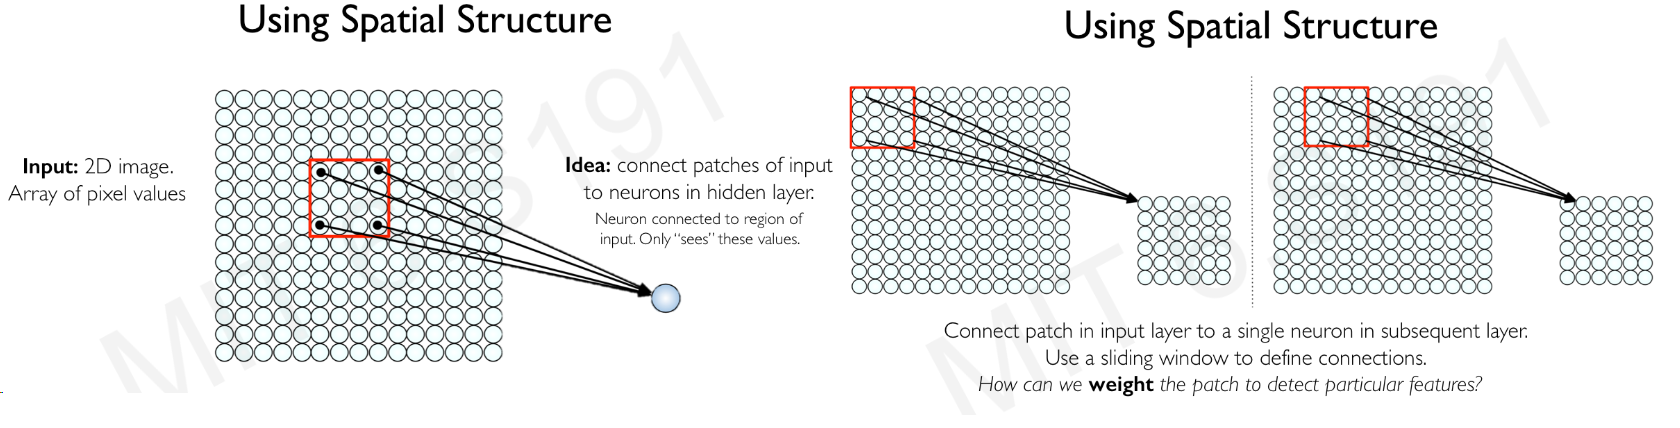

###In practice this operation is called convolution

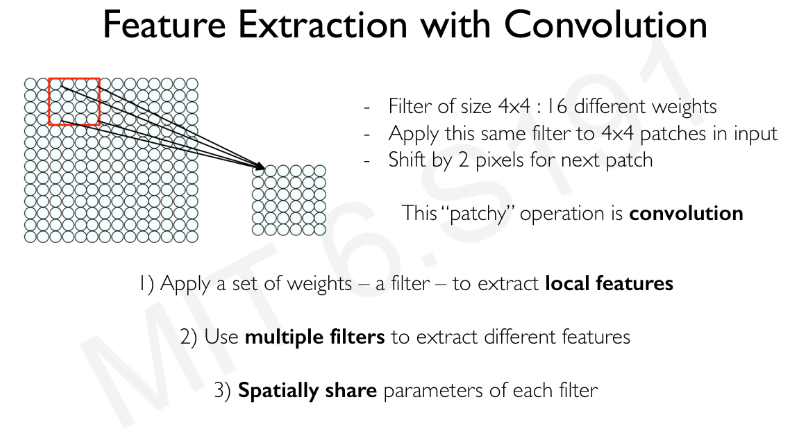

###Example of feature extraction and convolution.

What a model does is that it looks for features in an image, which means that it takes chunks of the image, analyzes them and compares them. For example:


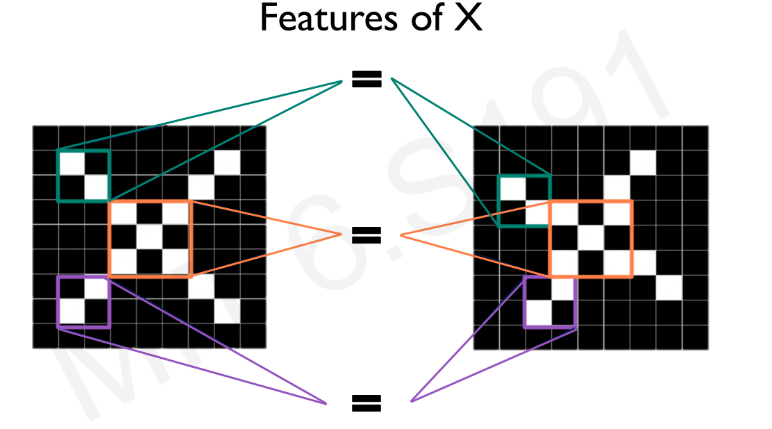

It seems that what this things do is that it defined "filters", which then are passed to an element wise multiplication operation, after the multiplication, the elements of the new matrix are added, the higher the sum, the larger the certainty of the filter, because if every pixel matches, the value will be 1 for every point in the matrix

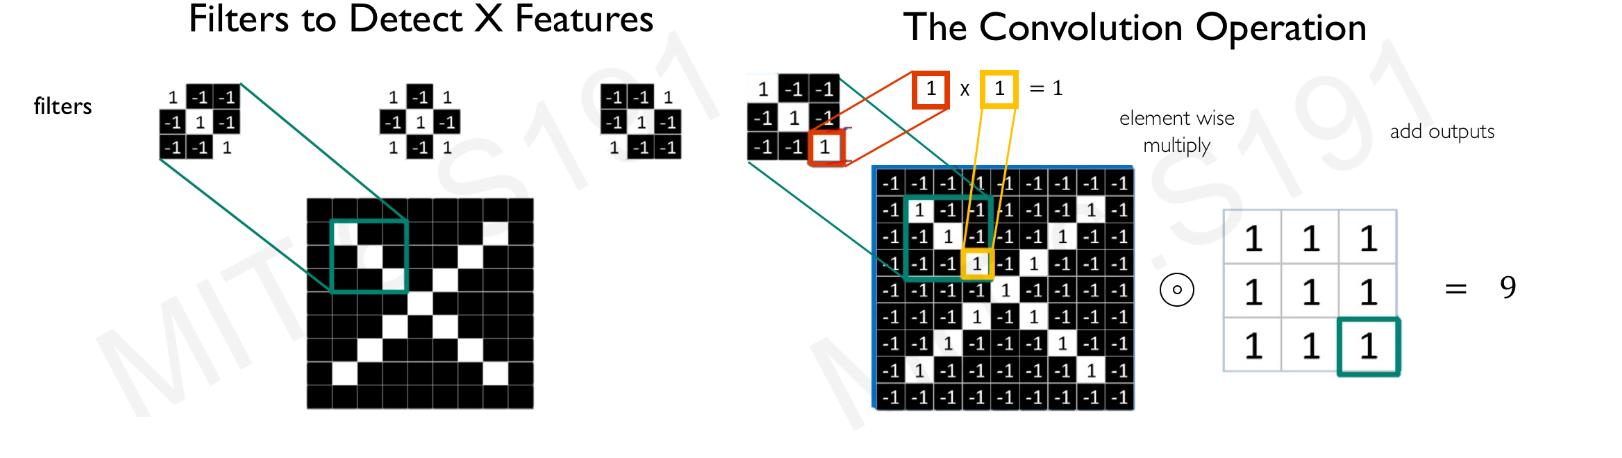

Then they do an example where they have a 5x5 image, and a 3x3 filter.

1. Place the patch on the top-left.
2. Perform the element-wise-multiplication and sum.
3. Add the values to a feature map.
4. Shuffle the patch. And repeat.



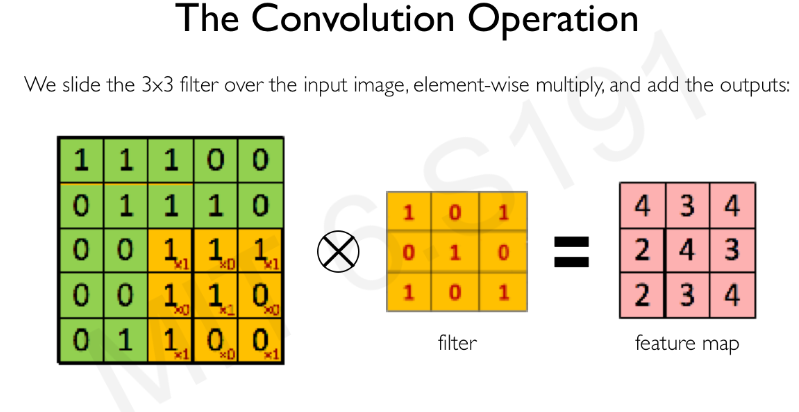

NOTE: It seems that you can change the weights of the filter.

By changing the weights and using different filters, you can search for and do different things.

#How to build Convolutional Neural Networks (CNN's)

Simple CNN for image classification

The 3 main steps are in the image

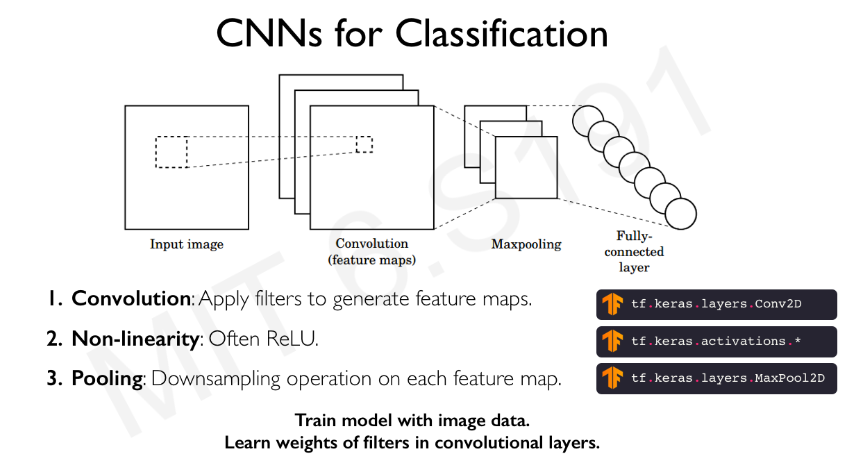

Note: Downsampling is the process of reducting the sampling rate of a signal, this is useually done to reduce the data rate or size of the data. 

http://www.voxforge.org/home/docs/faq/faq/what-is-downsampling 


####Step 1. The convolutional operation


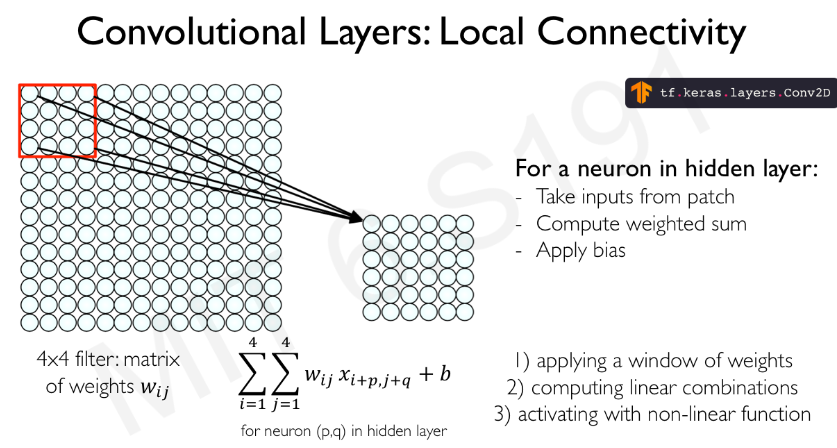

####With a single convolutional layer, we can have multiple different filters and features that we might want to extract or detect.

The output layer of a Convilution is not a single image, but rather a volume of images representing all of the filter that it detects.



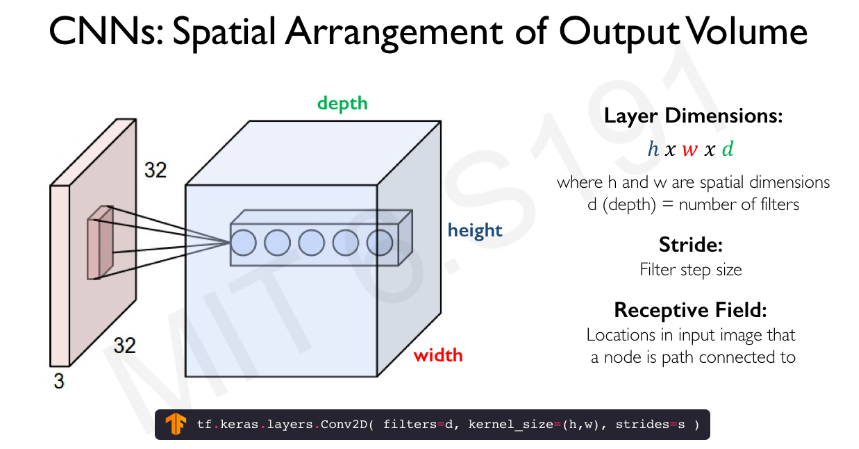

The filters = d is the number of features you want to extract or detect. 

The kernel_size are the spatial dimensions.

This is a single layer of the CNN.

###After the Convolution operation you add a, activation layer (ReLu). And then you add a Pooling layer. 

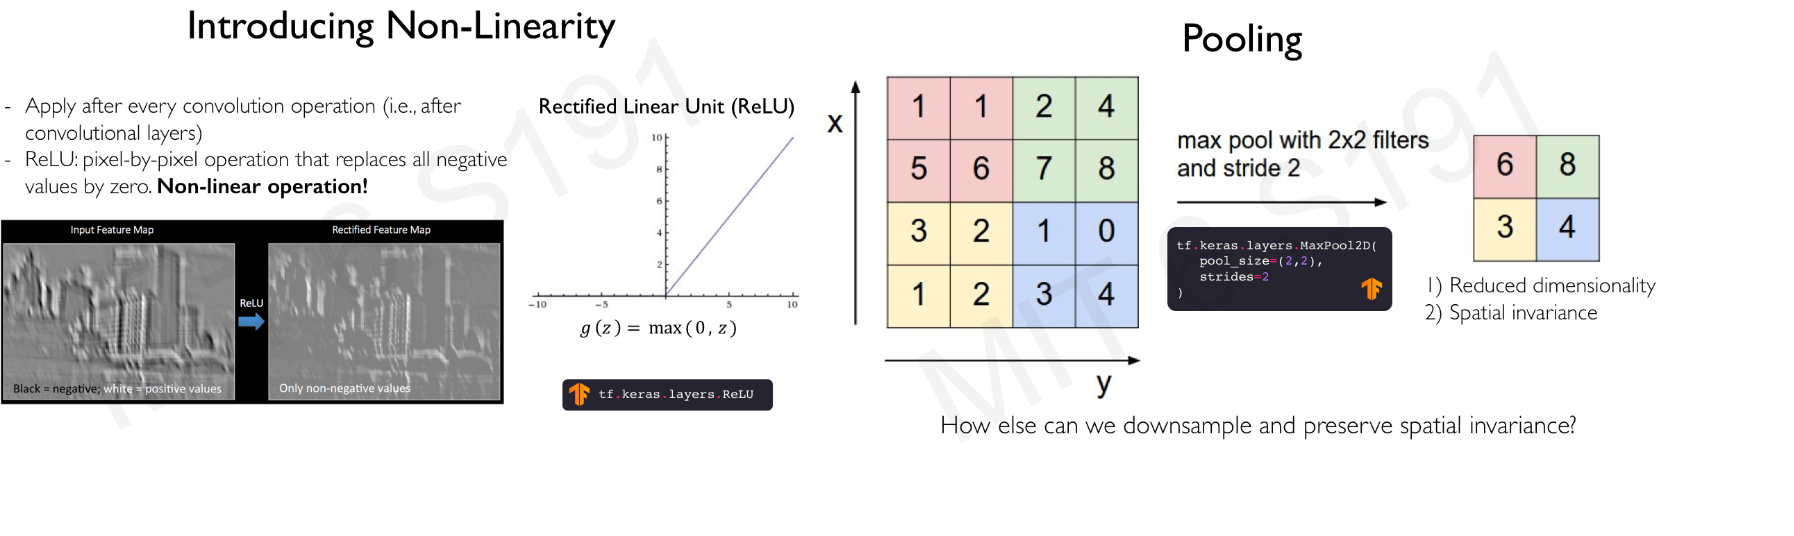

####Regarding the question of How else can we downsample and preserve spatial invariance.

* I do not kno. Maybe averages?

####The "inner workings" of a classification CNN

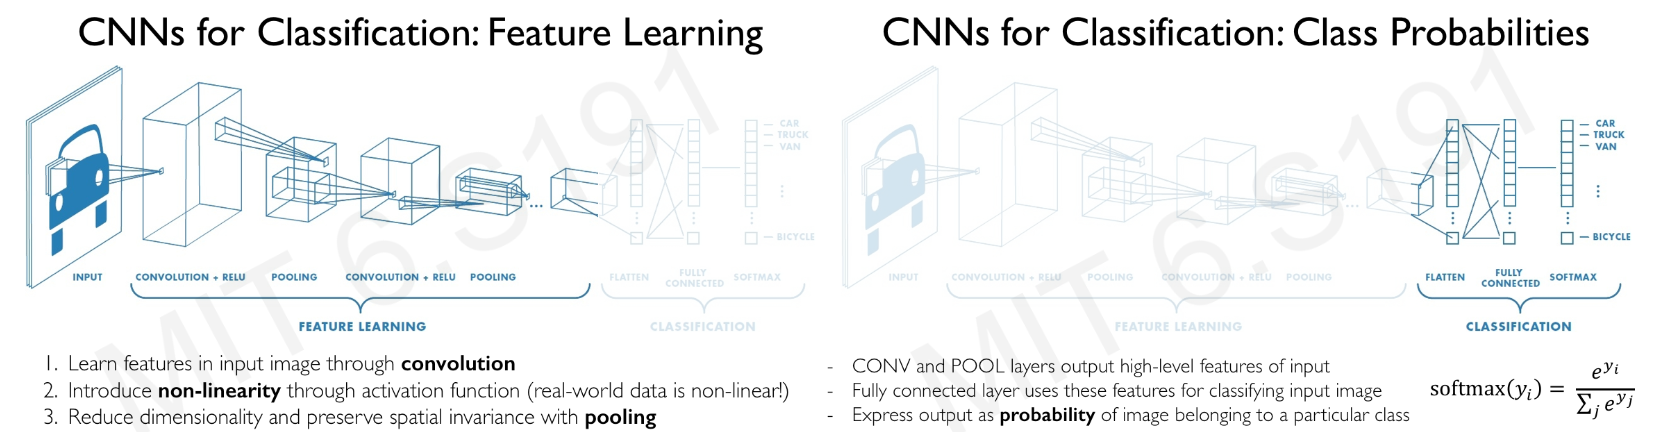

NOTE: This architecture can be used for many uses, you can use the same feature extractor, but attach different things (the second part) to do things like:
* Detection (Breast cancer screening)
* Semantic sementation (what is the class of a pixel, eg: is this pixel part of a cat, the sky, a building...)
* End-2-End robotic control (Automatic driving)

##Putting it all togheter

In [0]:
def generate_model():
  model = tf.keras.Sequential([
    #first conv layer
    tf.keras.layers.Conv2D(32, filter_size = 3, activation='relu'), #32 is the number of filters.
    tf.keras.later.MaxPool2D(pool_size = 2, strides = 2), #reduce dimensionality

    #second conv layer
    tf.keras.layers.Conv2D(64, filter_size = 3, activation='relu'),
    tf.keras.later.MaxPool2D(pool_size = 2, strides = 2),

    #Fully connected classifier.
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') #10 outputs (possible classifications)
  ])

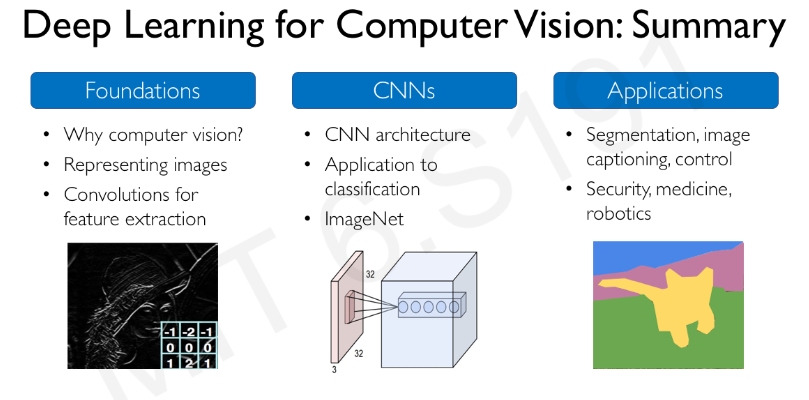